## Analiza składowych głównych (PCA, *ang Principal Component Analysis*)

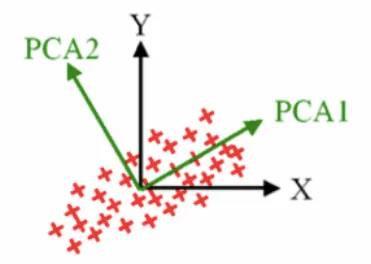

Popatrzmy na działanie algorytmu PCA na danych ze zbioru MNIST.

### Przykład I MNIST

In [49]:
!pip install tensorflow


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Zbiór MNIST można pobrać z wielu miejsc. Jest m.in. dostępny w bibliotece keras (module biblioteki tensorflow).

In [50]:
from keras.datasets import mnist

In [51]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Wyświetlmy kilka przykładowych obrazów, żeby zapoznać się z MNISTem

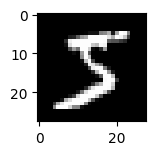

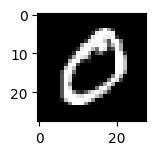

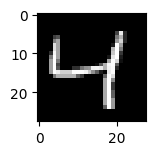

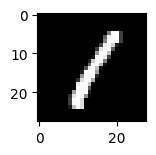

In [52]:
import matplotlib.pyplot as plt

for i in range(4):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

Popatrzmy na pojedynczy obrazek

In [53]:
single_image = x_train[0]
print(single_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

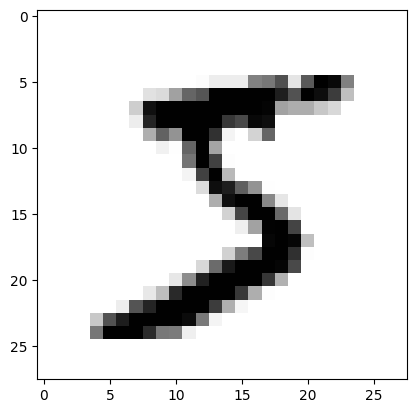

In [54]:
plt.imshow(single_image, cmap='gray_r')

Popatrzmy na etykiety


In [55]:
print(y_train)  # lista 60000 wartości

[5 0 4 ... 5 6 8]


Ok, zacznijmy przetwarzanie. 

Po pierwsze popatrzmy jeszcze raz na wymiar naszych danych. 

In [56]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Należy zmienić kształt obrazka tak, żeby był jednowymiarowym sygnałem (z 784 cechami). Dla modelu nie ma znaczenia jaki rozstawimy wartości. Model będzie po prostu szukał wzorców w sygnale, niezależnie od tego w jaki sposób ten sygnał będzie interpretowany.

In [57]:
import numpy as np

# Reshape the 28x28 pixel images into a single 784x1 pixel vector using .reshape
x_train = np.reshape(x_train, (len(x_train), -1))/255
x_test = np.reshape(x_test, (len(x_test), -1))/255

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


Po drugie w PCA zawsze trzeba pracować z ustandaryzowanymi danymi w przeciwnym razie cecha, która ma największe wartości będzie miała dominujący wpływ.

In [58]:
from sklearn.preprocessing import StandardScaler

scaled_x_train = StandardScaler().fit_transform(x_train)

Znajdźmy składowe główne

In [59]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(scaled_x_train)
x_pca

array([[-9.22158806e-01, -4.81479035e+00,  6.75598364e-02, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.70897698e+00, -7.75440302e+00, -3.44791044e+00, ...,
         5.35342776e-15, -7.69040624e-16, -6.62893657e-16],
       [ 2.32838932e+00,  9.43133817e+00, -6.18411405e+00, ...,
         3.08324806e-15,  4.58285626e-16, -1.78664362e-18],
       ...,
       [-3.77721201e+00, -3.23056436e+00, -3.80619883e+00, ...,
        -2.35790073e-17,  1.34260839e-17,  1.16501811e-17],
       [ 1.72236917e+00, -4.94812525e+00,  6.95122764e-03, ...,
         2.87694650e-17, -2.19618412e-17,  9.03863909e-18],
       [-1.42725062e+00, -6.17538558e+00, -2.96768709e+00, ...,
         1.57972600e-17,  8.16473240e-18,  7.38837116e-18]])

Ile mamy składowych głównych?

In [60]:
x_pca.shape

(60000, 784)

784, tyle co cech. Póki co nie robimy żadnej redukcji.

Popatrzmy jaką część zmienności tłumaczą poszczególne składowe główne

In [61]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.64671692e-02, 4.07827199e-02, 3.73938042e-02, 2.88511485e-02,
       2.52110863e-02, 2.19426996e-02, 1.92334439e-02, 1.74579923e-02,
       1.53509230e-02, 1.40171960e-02, 1.34174302e-02, 1.20374194e-02,
       1.11456955e-02, 1.08992356e-02, 1.02864922e-02, 9.94486564e-03,
       9.36383280e-03, 9.21045666e-03, 8.93436778e-03, 8.69912619e-03,
       8.27363019e-03, 8.03417369e-03, 7.64845500e-03, 7.41772464e-03,
       7.15292868e-03, 6.91846831e-03, 6.84135964e-03, 6.56674546e-03,
       6.31676724e-03, 6.12919839e-03, 5.96255295e-03, 5.87716416e-03,
       5.71591699e-03, 5.62307416e-03, 5.54682002e-03, 5.38418374e-03,
       5.31182250e-03, 5.19605602e-03, 5.08211255e-03, 4.80005571e-03,
       4.76455820e-03, 4.69139360e-03, 4.54348956e-03, 4.51345787e-03,
       4.46963401e-03, 4.43383155e-03, 4.38215469e-03, 4.30381751e-03,
       4.26877901e-03, 4.23647017e-03, 4.04696121e-03, 3.99447403e-03,
       3.97456119e-03, 3.93820800e-03, 3.85813590e-03, 3.79042674e-03,
      

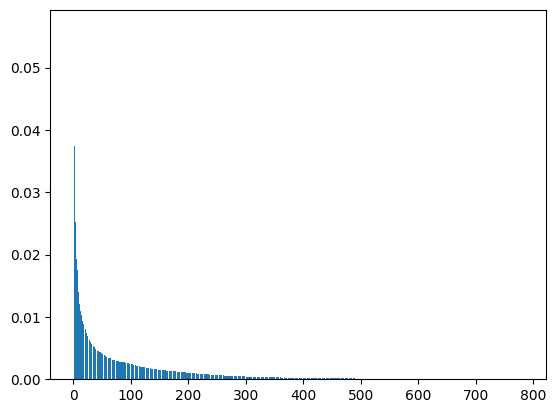

In [62]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

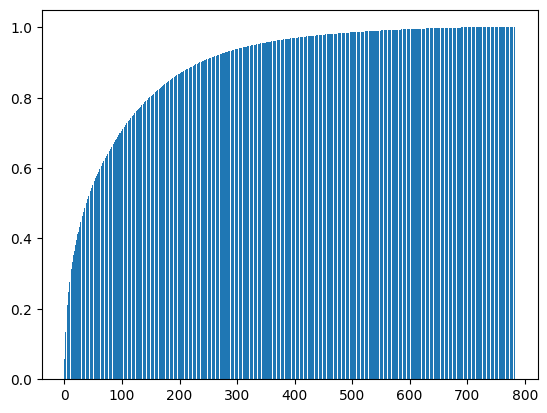

In [63]:
# kumulanta
plt.bar(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.show()

Klasa PCA przyjmuje opcjonalny parametr n_components. n_components oznacza:
* jeżeli n_components > 1, liczbę składowych głównych jaką chcemy uwzględnić (zaczynając od tej, która tłumaczy najwięcej zmienności, a potem schodząc w dół)
* jeżelie 0 < n_component > 1, jaką część zmienności sygnału chcemy zachować (w tym przypadku uwzględnionych zostanie tyle składowych głównych, żeby spełniony był warunek)

Dobierzmy tak parametr n_components, żeby otrzymać tylko tyle składowe główne ile potrzeba, żeby zachować 85% zmienności sygnału. 

In [64]:
pca = PCA(n_components=0.85)
x_pca = pca.fit_transform(scaled_x_train)
x_pca

array([[-9.22158806e-01, -4.81479035e+00,  6.75598364e-02, ...,
         2.76799832e-01,  2.52968430e-01, -4.30120958e-01],
       [ 8.70897698e+00, -7.75440302e+00, -3.44791044e+00, ...,
        -5.56854429e-01,  9.32616438e-01,  1.36548638e-01],
       [ 2.32838932e+00,  9.43133817e+00, -6.18411405e+00, ...,
         8.41963110e-01, -2.16324075e+00, -2.65064467e+00],
       ...,
       [-3.77721201e+00, -3.23056436e+00, -3.80619883e+00, ...,
         8.61622418e-01, -5.64109485e-01, -7.24422995e-01],
       [ 1.72236917e+00, -4.94812525e+00,  6.95122764e-03, ...,
         8.23470642e-01, -4.35217245e-01,  3.26716709e-02],
       [-1.42725062e+00, -6.17538558e+00, -2.96768709e+00, ...,
         9.57927771e-01, -2.19096246e+00, -8.91056651e-01]])

In [65]:
x_pca.shape

(60000, 185)

Po wykonaniu PCA mamy zachowane 85% wariancji, przy redukcji z 784 wymiarów do 185 wymiarów. 185 składowych głównych tłumacz 85% zmienności sygnału.

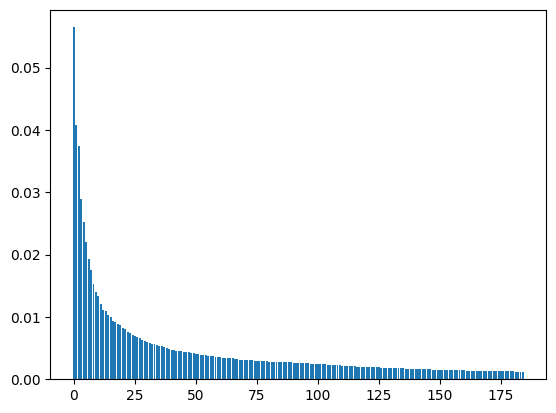

In [66]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

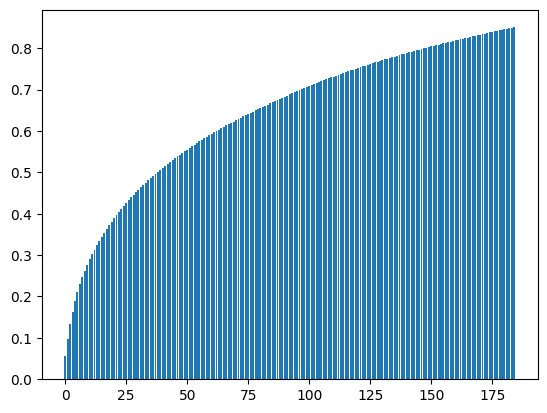

In [67]:
# kumulanta
plt.bar(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.show()

Zobaczmy jak teraz wyglądają nasze próbki.

In [68]:
reduced = pca.inverse_transform(pca.fit_transform(x_train))

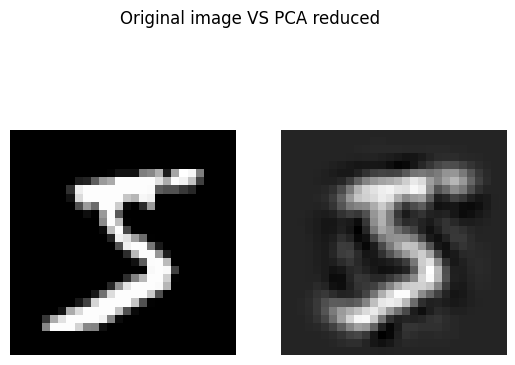

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.matshow(x_train[0].reshape(28,28), cmap='gray')
ax2.matshow(reduced[0].reshape(28,28), cmap='gray')

ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y_train[0]))
plt.show()

Teraz spróbujmy jeszcze użyć PCA do wizualizacji danych (czyli musimy zredukować wymiary do 2, ewentualnie 3 lub 1, tak żeby można było wynik nanieść na wykres.

<timed exec>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


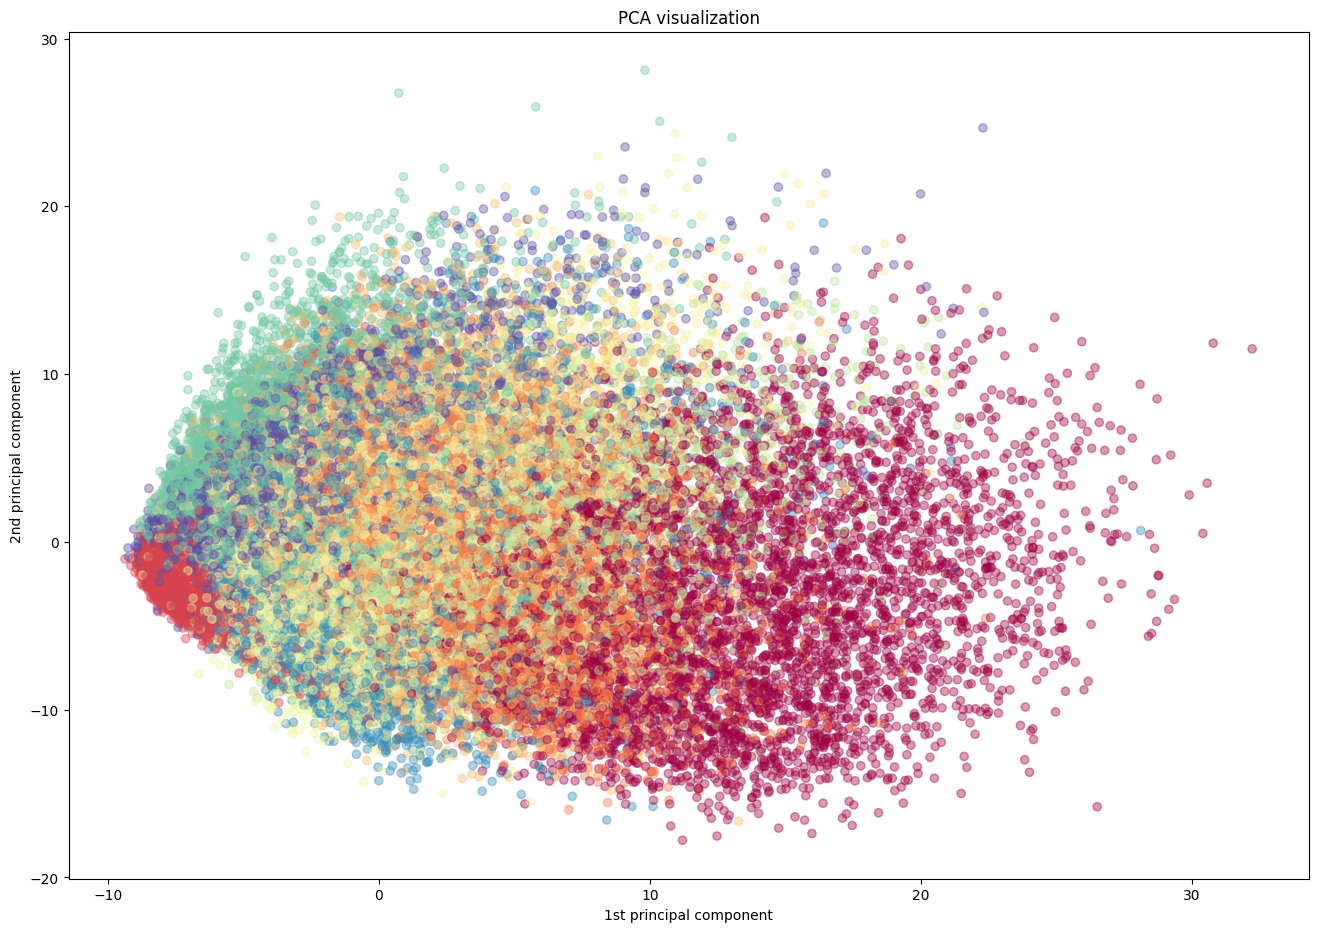

CPU times: total: 11.9 s
Wall time: 2.76 s


In [70]:
%%time

pca = PCA(n_components=2)  # redukujemy do dwóch wymiarów
pca_results = pca.fit_transform(scaled_x_train)

# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=pca_results[:,0], 
    y=pca_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("PCA visualization")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [71]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.05646717, 0.04078272])

Cięzko byłoby na takmi zbiorze wytyczyć krzywą decyzyjną. Jak widać nie po to uruchamiamy PCA, żeby polepszyć separowalność danych. Gdbyśmy chcieli zachować jak nalepszą separowalność danych zamiast PCA lepiej jest użyć metody t-SNE lub UMAP.

### Przykład II Iris dataset

Zbiór Irs dataset znajduje się pod adresem https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data i przedstawia pomiary płatków wykonane na trzech gatunków irysów.

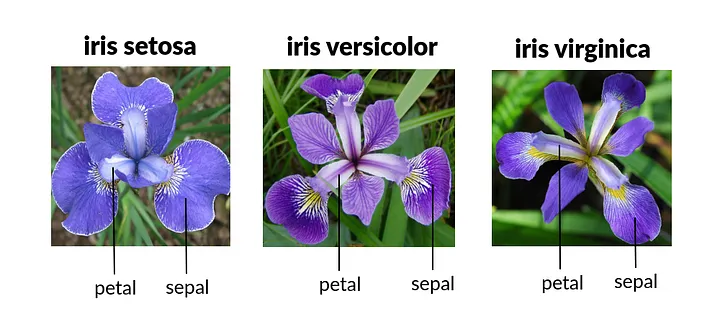

Mierzone był wymiary dwóch płatków oraz zbierana informacja o tym jakiego gatunku dotyczy pomiar.

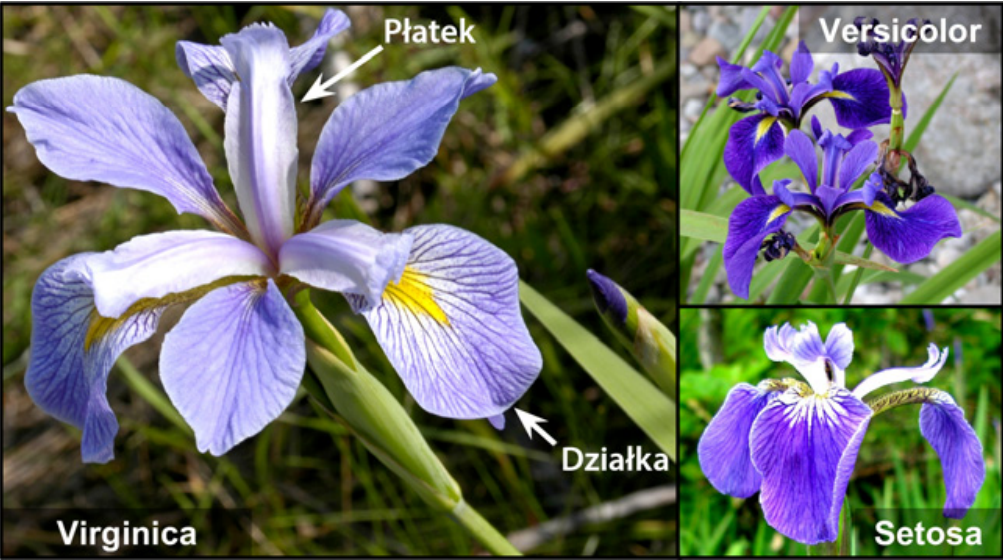

Uwaga! Zbiór zawiera wyłącznie pomiary. Nie działamy już na obrazach.

In [72]:
import pandas as pd
import sklearn

In [73]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Mamy czetry wymiary i 150 próbek. Ustandaryzujmy pomiary.

In [74]:
from sklearn.preprocessing import StandardScaler

variables = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, variables].values
y = df.loc[:,['target']]

x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Są czetry cechy w danych wejściowych, zatem PCA obliczy nam taką samą liczbę składowych głównych.

In [75]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


Popatrzmy ile wariancji tłumaczone jest przez kolejne składowe główne.

In [76]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

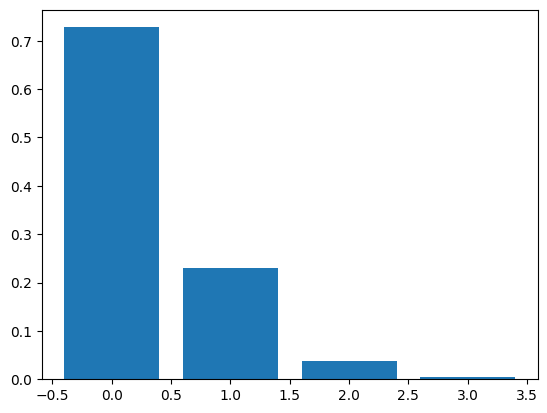

In [77]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

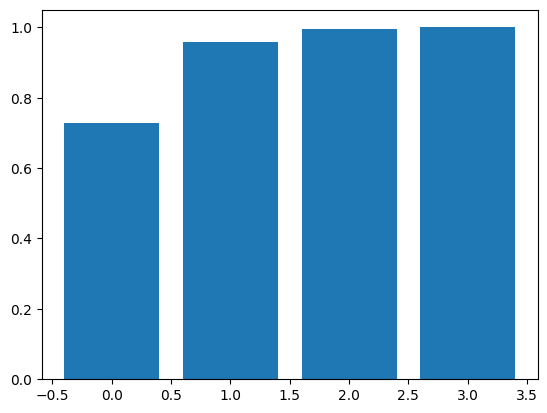

In [78]:
# kumulanta
plt.bar(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.show()

Pierwsz składowa główn tłumaczy ponad 72% zmienności sygnału, druga 23%, trzecia 3.6%, a czwarta 0.51%.

72.22% + 23.9% = 96.21% zmienności sygnału jest tłumaczone przez same, dwie pierwsze składowe główne.

In [79]:
x_pca['target']=y
x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'target']
x_pca.head()

,PC1,PC2,PC3,PC4,target
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


Patrząc na stopień objaśnienia wariancji przez pierwsze dwie składowe główne prawdopodbna jest teza, że do reprezentacji sygnału wystarczą nam te dwie składowe.

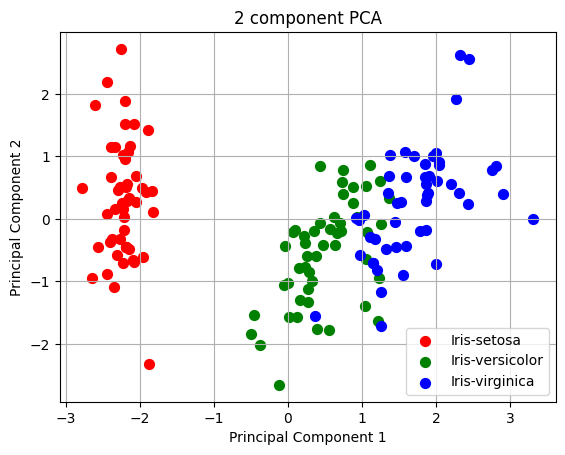

In [80]:
# The outcome shows the data are separable in the new space.
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = x_pca['target'] == target
    ax.scatter(
        x_pca.loc[indicesToKeep, 'PC1'], 
        x_pca.loc[indicesToKeep, 'PC2'], 
        c = color, 
        s = 50
    )
ax.legend(targets)
ax.grid()

Widzimy, że dodatkowo te dwie zmienne separują nam ładnie cały zbiór.

Ok, wszystko działa. Ale w jaki sposób sklearn znajduje te składowe główne? Jaka matematyk jest pod spodem?

### Zadanie I Gatunki ryb

W pliku 'Dane/fish.csv' znajdują się pomiary 158 ryb z siedmiu różnych gatunków. Wczytaj dane, popatrz na cechy (nawet patrząc po samych nazwach sprawiają wrażenie nadmiarowych). Przeprowadź analizę składowych głównych. Przedstaw dane na wykresie zachowując conajmniej 80% wariancji w danych.

### Zadanie II Zwyczaje żywieniowe

W pliku '../Dane/food.txt' znajdują się dane dotyczące zwyczajów żywieniowych w czterech krajach Wielkiej Brytanii - Anglii, Walii, Szkocji i Irlandii Północnej. Dane przedstawiają przypadające na jednego człowieka średnie, tygodniowe spożycie poszczególnych produktów spożywczych w gramach. Więcej o danych można poczytać tutaj http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf

### Zadanie 3 Charakterystyki miast

W pliku '../Dane/cities.txt' znajdują się dane dotyczące 46 miast świata. Zredukuj wymiary, nanieś dane na wykres, wskaż miasta, w których żyje się najlepiej.

### Zadanie 4 PCA na potrzeby regresji liniowej

W pliku '../Dane/longley.csv' znajdują się dane dotyczące makroekonomii Stanów Zjednoczonych (szczegółowe informacje można znaleźć tutaj https://stat.ethz.ch/R-manual/R-patched/library/datasets/html/longley.html)

*Ciekawostka. Połączenie regresji liniowej i analizy składowych głównych nosi nazwę Principal Component Regression (PCR)*

### Technikalia

Metoda PCA wykorzystuje narzędzia dostarczane przez algebrę liniową. Do najważniejszych zagadnień wykorzystywanych w PCA należą: wektor, macierz, mnożenie macierzy, wyznacznik macierzy, rozkład (faktoryzacja) macierzy, SVD, wektory i wartości własne macierzy. Szczegółowo nie będziemy omawiali tych zagadnień, ale warto nakreślić intuicje matematyczną.

W przypadku chęci pogłębienia wiedzy matematycznej materiałmi wartymi uwagi są:

* [Czym są wektory ?](https://www.youtube.com/watch?v=2OGJvGAniRU)
* [3Blue1Brown Linear Algebra course](https://www.youtube.com/watch?v=kjBOesZCoqc&list=PL0-GT3co4r2y2YErbmuJw2L5tW4Ew2O5B)
* [Gilbert Strang - Matrix methods in Data Analysis, Signal Processing, and Machine Learning](https://www.youtube.com/watch?v=Cx5Z-OslNWE&list=PLUl4u3cNGP63oMNUHXqIUcrkS2PivhN3k)